# Einfluss der Quantisierung auf den Frequenzbereich
Dieses Notebook demonstriert den Einfluss der Quantisierung auf den Frequenzbereich

Ein Sinussignal wird auf eine vorgegebene Anzahl von
Vor- und Nachkommabits mit verschiedenen Quantisierungs- und Overflowmethoden.verschiedene Arten quantisiert.

In [10]:
import os, sys
import numpy as np
from numpy.fft import fft, ifft, fftshift, ifftshift, fftfreq
from numpy import pi, sin, log10, sqrt
np.seterr(divide='ignore')

%matplotlib inline
module_path = os.path.abspath(os.path.join('..')) # append directory one level up to import path
if module_path not in sys.path:  # ... if it hasn't been appended already
    sys.path.append(module_path)
import dsp_fpga_fix_lib as fx

import matplotlib.pyplot as plt
figsize = {"figsize":(15,5)}

In [11]:
NOISE_LABEL = True # add second axis for noise power density
NFFT = 2000; f_a = 2; N_per = 7
T_mess = N_per / f_a; T_S = T_mess / NFFT
t = np.linspace(0, T_mess, NFFT, endpoint=False)
a = 1.1 * sin(2 * pi * f_a * t)
#
q_obj = {'WI':1, 'WF': 3, 'quant':'round', 'ovfl': 'wrap'} # versuchen Sie auch 'floor' / 'fix' und 'sat'
fx_a = fx.Fixed(q_obj)
aq = fx_a.fixp(a)

print('Anzahl der Überläufe = ', fx_a.N_over)

Anzahl der Überläufe =  0


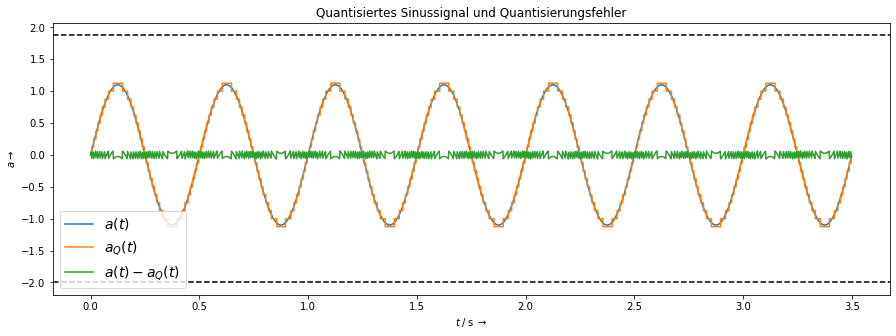

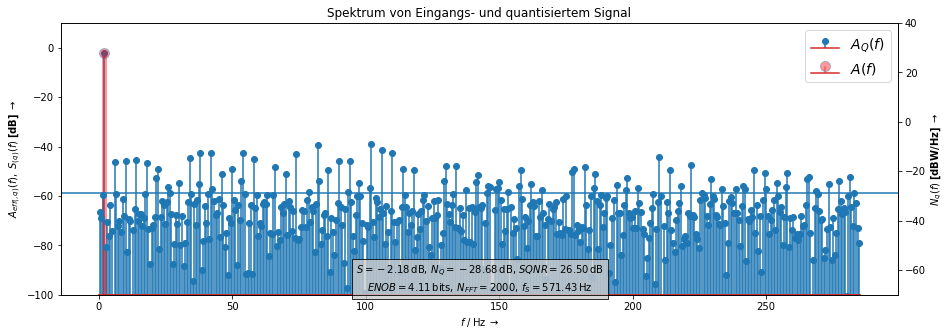

In [12]:
fig1, ax1 = plt.subplots(**figsize)
ax1.set_title('Quantisiertes Sinussignal und Quantisierungsfehler')
ax1.plot(t, a, label = r'$a(t)$')
ax1.step(t, aq, where = 'post', label = r'$a_Q(t)$')
ax1.plot(t, a-aq, label = r'$a(t) - a_Q(t)$')
ax1.legend(fontsize = 14)
ax1.set_xlabel(r'$t \; \mathrm{/ \; s} \; \rightarrow$'); ax1.set_ylabel(r'$a \rightarrow$')
A_max = 2**q_obj['WI'] - 2**-q_obj['WF']; A_min = -2**q_obj['WI']
ax1.axhline(y = A_max, linestyle = '--', color = 'k')
ax1.axhline(y = A_min, linestyle = '--', color = 'k')
#
A_bottom = -100 # Unteres Limit in dB für die Darstellung
A =  abs(2 / sqrt(2) * fft(a) / NFFT)[0:NFFT // 2 - 1]  # einseitiges Spektrum,
AQ = abs(2 / sqrt(2) * fft(aq) / NFFT)[0:NFFT // 2 - 1] #    Effektivwert !
A[0] = A[0] * sqrt(2)/2; AQ[0] = AQ[0] * sqrt(2)/2  # korrigiere DC-Wert zurück
f = fftfreq(NFFT, T_S)[0:NFFT//2 - 1]      # Frequenzen f. einseitiges Spektrum
#
fig2, ax2 = plt.subplots(**figsize)
ax2.set_title('Spektrum von Eingangs- und quantisiertem Signal')
ax2.stem(f, 20 * log10(AQ), bottom = A_bottom, label = r'$A_Q(f)$', use_line_collection=True)
ml, sl, bl = ax2.stem(f,  20 * log10(A), bottom = A_bottom, label = r'$A(f)$', use_line_collection=True)
plt.setp(ml, 'markerfacecolor', 'r', 'markersize', 10 ,'alpha', 0.4) # Marker
plt.setp(sl, 'color','r', 'linewidth', 5, 'alpha', 0.4)    # Stemline
AQ[N_per] = abs(AQ[N_per] - A[N_per]) # Subtrahiere Signal
S = 10*log10(A[N_per]**2.)       # Signalleistung, gemessen
N_PSD = 10 * log10(np.average(AQ*AQ))   # mittlere Rauschleistungsdichte
NQ = N_PSD + 10*log10(NFFT/2)
ENOB = ((S-NQ) - 1.76)/6.02
# print(S, NQ, S - NQ)
ax2.axhline(y = N_PSD) # plotte horiz. Linie mit mittlerer Rauschleist.dichte
ax2.set_xlabel(r'$f \; \mathrm{/ \; Hz} \; \rightarrow$')
ax2.set_ylabel(r'$A_{eff(,q)}(f), \;S_{(q)}(f)\; \mathbf{[dB]} \;\rightarrow$')
ax2.set_ylim(A_bottom,10)
ax2.text(1/(4*T_S), A_bottom,
         r'$S = %.2f \, \mathrm{dB},\, N_Q = %.2f \, \mathrm{dB}$, '
         r'$SQNR = %.2f \, \mathrm{dB}$'%(S, NQ, S-NQ) + '\n' +
         r'$ENOB = %.2f \, \mathrm{bits},\, N_{FFT} = %d,\, f_S = %.2f\,'
         r'\mathrm{Hz}$'%(ENOB, NFFT, 1./T_S),
        ha='center', va='bottom', bbox=dict(facecolor='0.8', alpha=0.8))
     #
ax2.legend(fontsize = 14)
if NOISE_LABEL:
    ax2b = ax2.twinx()
    ax2b.set_ylim(ax2.get_ylim()+ 10*log10(NFFT/2))
    ax2b.set_ylabel(r'$N_q(f)\;  \mathbf{[dBW / Hz]} \; \rightarrow$')

### Fragen und Experimente

Überlegen / überprüfen Sie jeweils:
- Passt die Formel SQNR = (6.02 w + 1.76) dB ?
- Wie kann man den angezeigten mittleren Rauschpegel umrechnen in die Rauschleistung?


***
### Copyright

(c) 2016 - 2018 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp_fpga "Digitale Signalverarbeitung auf FPGAs"

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources), feel free to use it for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing auf FPGAs - Vorlesungsunterlagen mit Simulationsbeispielen, 2018*.